<a href="https://colab.research.google.com/github/IsaacFigNewton/CSC-480/blob/main/Lab6_480_Rudnick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 6 – Day 1: Decision Trees on the Breast Cancer Dataset
Dataset


- We will use the Breast Cancer Wisconsin dataset, a built-in dataset from sklearn.datasets.

- It contains 30 features computed from digitized images of a breast mass and a binary target: malignant or benign.


Lab Tasks
1. Setup

In [ ]:
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

2. Load and Explore the Data

In [ ]:
data = load_breast_cancer()

X, y = data.data, data.target

print("Features:", data.feature_names)

print("Target names:", data.target_names)

print("Shape:", X.shape)


Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Shape: (569, 30)


3. Split the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Train the Decision Tree

In [ ]:
clf = DecisionTreeClassifier(max_depth=10, random_state=42)

clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

5. Visualize the Tree

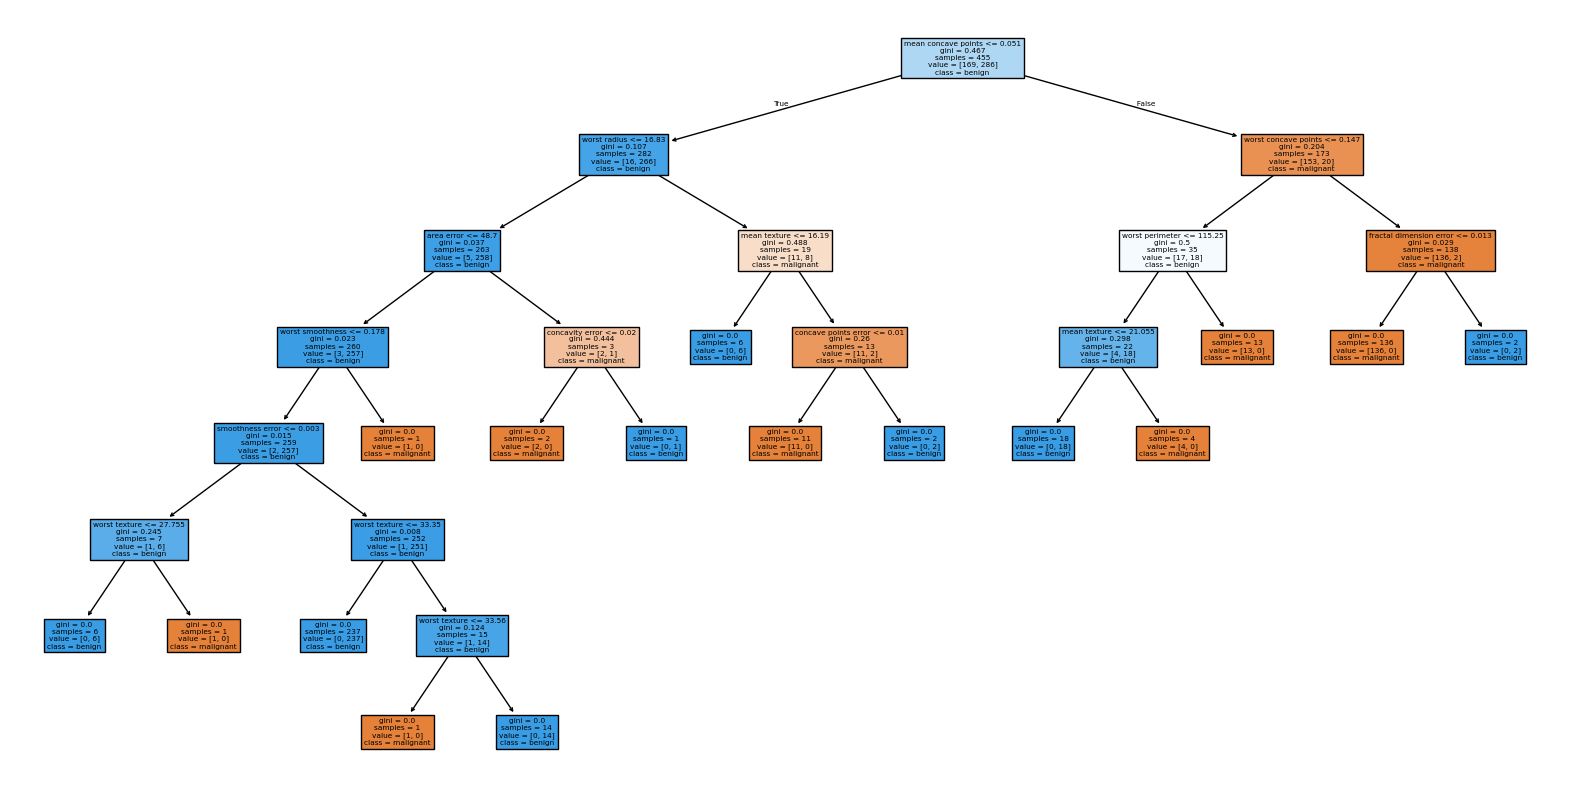

In [ ]:
plt.figure(figsize=(20,10))

plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)

plt.show()


6. Evaluate the Classifier

Testing Accuracy: 0.9473684210526315
Training Accuracy: 1.0


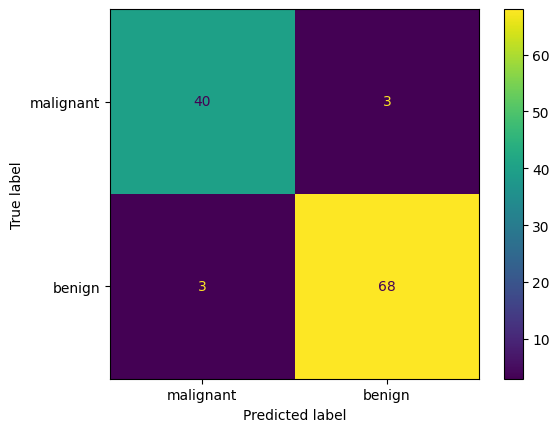

In [ ]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Testing Accuracy:", acc)

y_pred2 = clf.predict(X_train)

acc = accuracy_score(y_train, y_pred2)

print("Training Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)

disp.plot()

plt.show()


Answer the accompanying reflection Questions

Lab 6 – Day 2: Feedforward Neural Networks on Fashion MNIST


Objective
- Train a dense (non-convolutional) neural network on image data using TensorFlow/Keras to classify clothing items.

Setup
- Requirements: Google Colab (no setup required, TensorFlow is pre-installed)

Dataset: Fashion MNIST
- A set of grayscale images (28×28) of clothing types.

Classes:

0: T-shirt/top


1: Trouser


2: Pullover


3: Dress


4: Coat


5: Sandal


6: Shirt


7: Sneaker


8: Bag


9: Ankle boot


1. Import Libraries


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


2. Load and Normalize Data

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize to [0, 1]


3. Visualize the Dataset

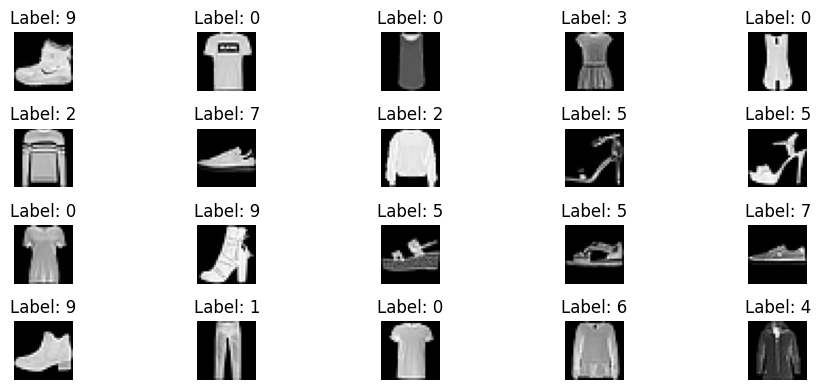

In [151]:
plt.figure(figsize=(10, 4))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


4. Build a Feedforward Neural Network

In [125]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5. Compile and Train

In [126]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7795 - loss: 0.6380 - val_accuracy: 0.8467 - val_loss: 0.4210
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8627 - loss: 0.3841 - val_accuracy: 0.8453 - val_loss: 0.4160
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8794 - loss: 0.3396 - val_accuracy: 0.8755 - val_loss: 0.3543
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8844 - loss: 0.3109 - val_accuracy: 0.8617 - val_loss: 0.3760
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8901 - loss: 0.2982 - val_accuracy: 0.8772 - val_loss: 0.3378
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8939 - loss: 0.2839 - val_accuracy: 0.8822 - val_loss: 0.3275
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9013 - loss: 0.2664 - val_accuracy: 0.8723 - val_loss: 0.3368
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9067 - loss: 0.2585 - 

6. Evaluate the Model

test set accuracies:
- relu: 0.8816
- sigmoid: 0.8779
- tanh:
- leaky_relu:
- linear:
- log_sigmoid:
- log_softmax

In [127]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8824 - loss: 0.3332
Test Accuracy: 0.8814


7. Plot Learning Curves

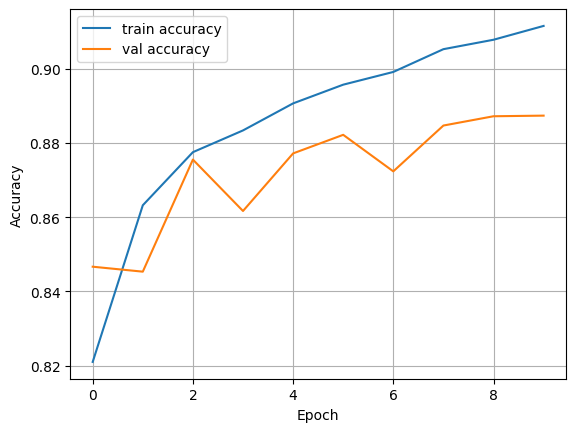

In [128]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Answer Reflection Questions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


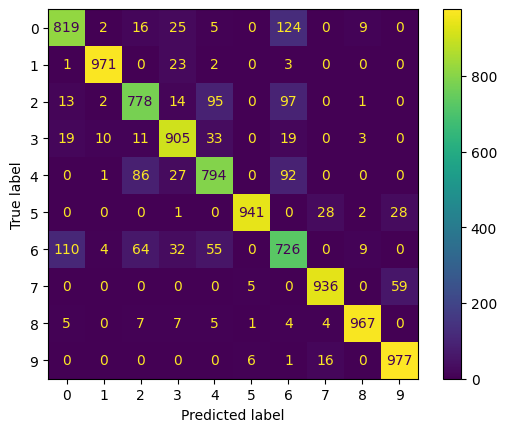

In [129]:
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

plt.show()

In [ ]:
def try_diff_activation_functions(activation_functions):
    test_accs = dict()
    for activation in activation_functions:
      model = keras.Sequential([
          keras.layers.Flatten(input_shape=(28, 28)),
          keras.layers.Dense(128, activation=activation),
          keras.layers.Dense(10, activation='softmax')
      ])
      model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

      history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

      test_loss, test_acc = model.evaluate(X_test, y_test)
      test_accs[activation] = {
          "loss_decrease_rate": history.history['val_loss'][-1] - history.history['val_loss'][0],
          "accuracy": test_acc
      }

    return test_accs

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7771 - loss: 0.6417 - val_accuracy: 0.8492 - val_loss: 0.4167
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8590 - loss: 0.3880 - val_accuracy: 0.8680 - val_loss: 0.3657
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8787 - loss: 0.3366 - val_accuracy: 0.8672 - val_loss: 0.3678
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8860 - loss: 0.3155 - val_accuracy: 0.8785 - val_loss: 0.3391
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8885 - loss: 0.2986 - val_accuracy: 0.8865 - val_loss: 0.3310
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8988 - loss: 0.2704 - val_accuracy: 0.8767 - val_loss: 0.3421
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8988 - loss: 0.2699 - val_accuracy: 0.8840 - val_loss: 0.3302
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9023 - loss: 0.2587 -

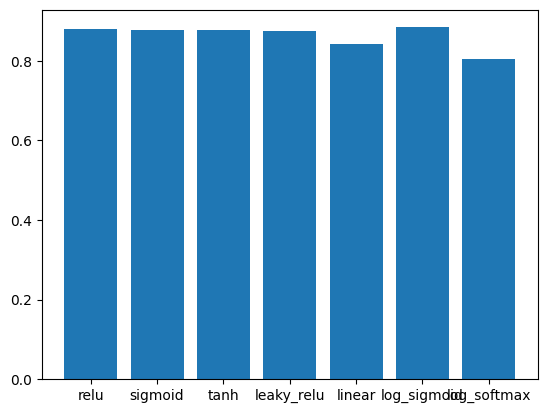

In [ ]:
activation_fn_test_accs = try_diff_activation_functions(['relu', 'sigmoid', 'tanh', 'leaky_relu', 'linear', 'log_sigmoid', 'log_softmax'])
plt.bar(activation_fn_test_accs.keys(), [v["accuracy"] for v in activation_fn_test_accs.values()])
plt.show()

In [ ]:
import json
print(json.dumps(activation_fn_test_accs, indent=4))

{
    "relu": {
        "loss_decrease_rate": -0.08788806200027466,
        "accuracy": 0.8791000247001648
    },
    "sigmoid": {
        "loss_decrease_rate": -0.09657469391822815,
        "accuracy": 0.8765000104904175
    },
    "tanh": {
        "loss_decrease_rate": -0.07412856817245483,
        "accuracy": 0.8773000240325928
    },
    "leaky_relu": {
        "loss_decrease_rate": -0.06497186422348022,
        "accuracy": 0.8748999834060669
    },
    "linear": {
        "loss_decrease_rate": -0.055494099855422974,
        "accuracy": 0.84170001745224
    },
    "log_sigmoid": {
        "loss_decrease_rate": -0.10126596689224243,
        "accuracy": 0.8841999769210815
    },
    "log_softmax": {
        "loss_decrease_rate": 0.013965129852294922,
        "accuracy": 0.804099977016449
    }
}


In [ ]:
try_diff_activation_functions(["softmax"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5600 - loss: 1.7650 - val_accuracy: 0.5807 - val_loss: 1.0943
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5941 - loss: 1.0252 - val_accuracy: 0.6148 - val_loss: 0.9013
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6157 - loss: 0.8752 - val_accuracy: 0.6392 - val_loss: 0.8336
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6688 - loss: 0.7818 - val_accuracy: 0.7170 - val_loss: 0.7120
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7263 - loss: 0.6755 - val_accuracy: 0.7325 - val_loss: 0.6571
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7375 - loss: 0.6337 - val_accuracy: 0.7407 - val_loss: 0.6339
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7502 - loss: 0.6110 - val_accuracy: 0.7473 - val_loss: 0.6187
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7524 - loss: 0.5991 - 

{'softmax': {'loss_decrease_rate': -0.4626014828681946,
  'accuracy': 0.7526000142097473}}

Lab 6 – Day 3: CNNs for Fashion MNIST

Objective

Introduce students to convolutional neural networks and show how they improve performance on image classification tasks by leveraging spatial structure.


Setup
- Platform: Google Colab (TensorFlow pre-installed)
- Dataset: Fashion MNIST (same as Day 2, but input needs reshaping for CNN)

1. Import Libraries


In [111]:
import tensorflow as tf

from tensorflow import keras

import matplotlib.pyplot as plt


2. Load and Preprocess Data

In [113]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape for CNN: (28,28) → (28,28,1)

X_train = X_train.reshape(-1, 28, 28, 1) / 255.0

X_test = X_test.reshape(-1, 28, 28, 1) / 255.0


3. Build a Simple CNN

In [114]:
model = keras.Sequential([

    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),

    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),

    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(10, activation='softmax')

])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4. Compile and Train


In [115]:
model.compile(optimizer='adam',

              loss='sparse_categorical_crossentropy',

              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7552 - loss: 0.6657 - val_accuracy: 0.8733 - val_loss: 0.3499
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8774 - loss: 0.3411 - val_accuracy: 0.8827 - val_loss: 0.3161
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8946 - loss: 0.2872 - val_accuracy: 0.8982 - val_loss: 0.2786
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9068 - loss: 0.2492 - val_accuracy: 0.9038 - val_loss: 0.2679
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9207 - loss: 0.2145 - val_accuracy: 0.9112 - val_loss: 0.2500
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9290 - loss: 0.1942 - val_accuracy: 0.9138 - val_loss: 0.2471
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9365 - loss: 0.1741 - val_accuracy: 0.9135 - val_loss: 0.2399
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9407 - loss: 0.1585

5. Evaluate and Plot Learning Curve

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9077 - loss: 0.2994
Test Accuracy: 0.9072


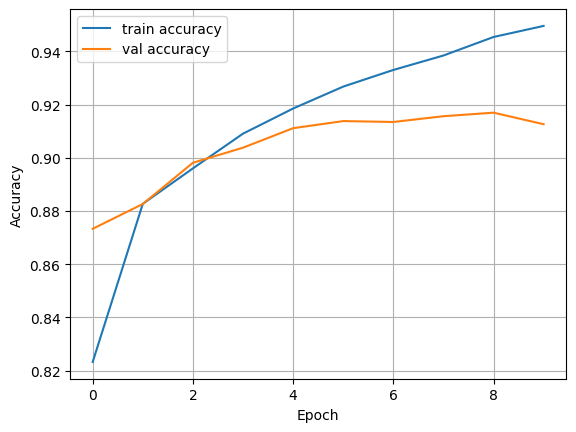

In [116]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc:.4f}")

plt.plot(history.history['accuracy'], label='train accuracy')

plt.plot(history.history['val_accuracy'], label='val accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()

plt.grid(True)

plt.show()


Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


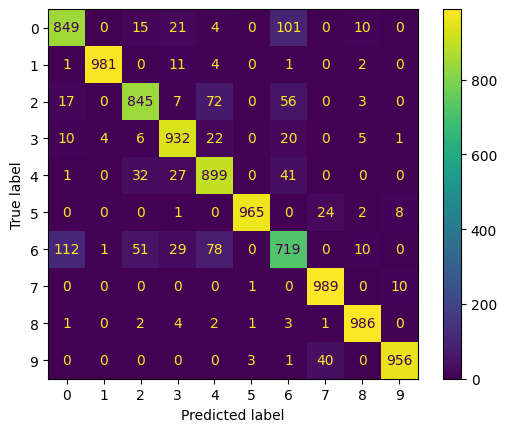

In [ ]:
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

plt.show()


Question answering

In [139]:
def try_hyperparams(conv:dict, pool:tuple, fc: dict):
    model = keras.Sequential([

        keras.layers.Conv2D(conv["filters"], conv["kernel"], activation=conv["activation"], input_shape=(28, 28, 1)),

        keras.layers.MaxPooling2D(pool),

        keras.layers.Conv2D(2*conv["filters"], conv["kernel"], activation=conv["activation"]),

        keras.layers.MaxPooling2D(pool),

        keras.layers.Flatten(),

        keras.layers.Dense(fc["neuron"], activation=fc["activation"]),

        keras.layers.Dense(10, activation='softmax')

    ])


    model.compile(optimizer='adam',

                  loss='sparse_categorical_crossentropy',

                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)
    test_loss, test_acc = model.evaluate(X_test, y_test)
    return test_acc

In [147]:
import pandas as pd

filters = [16, 64]
kernels = [(2, 2), (4, 4)]
pools = [(2, 2), (3, 3)]
neurons = [16, 64]

conv_hyperparams = list()
for f in filters:
    for k in kernels:
        for a in activations:
            conv_hyperparams.append({
                "filters": f,
                "kernel": k,
                "activation": a
            })
fc_hyperparams = list()
for n in neurons:
    fc_hyperparams.append({
        "neuron": n,
        "activation": "relu"
    })
hyperparams = list()
for conv in conv_hyperparams:
    for pool in pools:
          for fc in fc_hyperparams:
              hyperparams.append((conv, pool, fc))

hyperparams = pd.DataFrame(hyperparams, columns=["conv", "pool", "fc"])

In [148]:
hyperparams.head()

,conv,pool,fc
0,"{'filters': 16, 'kernel': (2, 2), 'activation'...","(2, 2)","{'neuron': 16, 'activation': 'relu'}"
1,"{'filters': 16, 'kernel': (2, 2), 'activation'...","(2, 2)","{'neuron': 64, 'activation': 'relu'}"
2,"{'filters': 16, 'kernel': (2, 2), 'activation'...","(3, 3)","{'neuron': 16, 'activation': 'relu'}"
3,"{'filters': 16, 'kernel': (2, 2), 'activation'...","(3, 3)","{'neuron': 64, 'activation': 'relu'}"
4,"{'filters': 16, 'kernel': (2, 2), 'activation'...","(2, 2)","{'neuron': 16, 'activation': 'relu'}"


In [ ]:
for i, row in hyperparams.iterrows():
    print(f"Training model {i+1}/{len(hyperparams)}")
    hyperparams.loc[i, "accuracy"] = try_hyperparams(row["conv"], row["pool"], row["fc"])

Training model 1/32
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1004 - loss: 2.3056 - val_accuracy: 0.0942 - val_loss: 2.3028
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1015 - loss: 2.3027 - val_accuracy: 0.1032 - val_loss: 2.3026
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1004 - loss: 2.3027 - val_accuracy: 0.1003 - val_loss: 2.3029
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0990 - loss: 2.3027 - val_accuracy: 0.1055 - val_loss: 2.3027
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1008 - loss: 2.3026 - val_accuracy: 0.0942 - val_loss: 2.3026
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1005 - loss: 2.3027 - val_accuracy: 0.1027 - val_loss: 2.3025
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0988 - loss: 2.3027 - val_accuracy: 0.1003 - val_loss: 2.3026
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0979 - loss: 2.3252 - val_accuracy: 0.1003 - val_loss: 2.3030
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0997 - loss: 2.3028 - val_accuracy: 0.0942 - val_loss: 2.3030
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0991 - loss: 2.3027 - val_accuracy: 0.0925 - val_loss: 2.3028
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1010 - loss: 2.3027 - val_accuracy: 0.0942 - val_loss: 2.3029
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3027 - val_accuracy: 0.0942 - val_loss: 2.3030
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1002 - loss: 2.3027 - val_accuracy: 0.0925 - val_loss: 2.3030
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.0942 - val_loss: 2.3029
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0990 - loss: 2.3027 - 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0975 - loss: 2.3081 - val_accuracy: 0.0942 - val_loss: 2.3029
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1020 - loss: 2.3027 - val_accuracy: 0.1003 - val_loss: 2.3026
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1011 - loss: 2.3027 - val_accuracy: 0.1003 - val_loss: 2.3026
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.1008 - val_loss: 2.3027
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1007 - loss: 2.3027 - val_accuracy: 0.1027 - val_loss: 2.3028
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0984 - loss: 2.3028 - val_accuracy: 0.0925 - val_loss: 2.3031
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1005 - loss: 2.3025 - val_accuracy: 0.1003 - val_loss: 2.3028
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1009 - loss: 2.3027 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4568 - loss: 1.4800 - val_accuracy: 0.7575 - val_loss: 0.6784
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7700 - loss: 0.6309 - val_accuracy: 0.7867 - val_loss: 0.5837
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7908 - loss: 0.5668 - val_accuracy: 0.7968 - val_loss: 0.5528
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7998 - loss: 0.5458 - val_accuracy: 0.7988 - val_loss: 0.5377
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8105 - loss: 0.5068 - val_accuracy: 0.8142 - val_loss: 0.4943
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8245 - loss: 0.4849 - val_accuracy: 0.8092 - val_loss: 0.5071
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8241 - loss: 0.4736 - val_accuracy: 0.8165 - val_loss: 0.4738
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8291 - loss: 0.4608 - 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0964 - loss: 2.3030 - val_accuracy: 0.0985 - val_loss: 2.3028
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0997 - loss: 2.3027 - val_accuracy: 0.0925 - val_loss: 2.3027
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0990 - loss: 2.3027 - val_accuracy: 0.1008 - val_loss: 2.3026
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0990 - loss: 2.3027 - val_accuracy: 0.0973 - val_loss: 2.3030
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0991 - loss: 2.3027 - val_accuracy: 0.0925 - val_loss: 2.3029
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0981 - loss: 2.3027 - val_accuracy: 0.0925 - val_loss: 2.3031
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0994 - loss: 2.3026 - val_accuracy: 0.1003 - val_loss: 2.3027
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1000 - loss: 2.3028 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1004 - loss: 2.3034 - val_accuracy: 0.0942 - val_loss: 2.3030
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1020 - loss: 2.3027 - val_accuracy: 0.0925 - val_loss: 2.3030
Epoch 3/10
 226/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1028 - loss: 2.3027

In [ ]:
# sort the dataframe entries by the "accuracy" column in descending order
hyperparams = hyperparams.sort_values(by="accuracy", ascending=False)
hyperparams.head()

Lab 6 – Day 4: Reinforcement Learning – The Vacuum Robot (4×4 Grid)

Objective
- Introduce students to reinforcement learning by training a vacuum robot using Q-learning in a larger and more complex 4x4 grid world.

Scenario
- A robot operates in a 4x4 grid (16 locations). Each cell may be dirty or clean.

- The agent can move up, down, left, right.

- Cleaning a dirty tile gives a reward of +10.

- Every move costs -1 (to encourage efficiency).

Setup: Import Libraries and Initialize Environment


In [130]:
import numpy as np
import random
import matplotlib.pyplot as plt

Part 1: Define the Grid World
We'll define a 4x4 grid where:

Each tile can be clean or dirty.

The agent can move up, down, left, right.

Cleaning a dirty tile gives a reward of +10.

Every move costs -1 (to encourage efficiency).

In [131]:
GRID_SIZE = 4
ACTIONS = ['UP', 'DOWN', 'LEFT', 'RIGHT', 'CLEAN']
NUM_ACTIONS = len(ACTIONS)

def random_dirty_grid():
    return np.random.choice([0, 1], size=(GRID_SIZE, GRID_SIZE), p=[0.5, 0.5])


Part 2: Define the Environment Dynamics

In [132]:
class VacuumEnv:
    def __init__(self):
        self.reset()

    def reset(self):
        self.grid = random_dirty_grid()
        self.agent_pos = [0, 0]
        return self._get_state()

    def _get_state(self):
        x, y = self.agent_pos
        return (x, y, self.grid[x][y])

    def step(self, action):
        x, y = self.agent_pos
        reward = -1  # default move penalty

        if action == 'CLEAN':
            if self.grid[x][y] == 1:
                self.grid[x][y] = 0
                reward = 10
        else:
            if action == 'UP' and x > 0:
                x -= 1
            elif action == 'DOWN' and x < GRID_SIZE - 1:
                x += 1
            elif action == 'LEFT' and y > 0:
                y -= 1
            elif action == 'RIGHT' and y < GRID_SIZE - 1:
                y += 1
            self.agent_pos = [x, y]

        done = np.sum(self.grid) == 0  # all clean
        return self._get_state(), reward, done


Part 3: Initialize Q-Table

In [133]:
q_table = {}

def get_q(state):
    if state not in q_table:
        q_table[state] = np.zeros(NUM_ACTIONS)
    return q_table[state]


Part 4: Q-Learning Algorithm

In [134]:
EPISODES = 5000
LEARNING_RATE = 0.1
DISCOUNT = 0.9
EPSILON = 0.2

for ep in range(EPISODES):
    env = VacuumEnv()
    state = env.reset()
    done = False

    while not done:
        if random.uniform(0, 1) < EPSILON:
            action_idx = random.randint(0, NUM_ACTIONS - 1)
        else:
            action_idx = np.argmax(get_q(state))

        action = ACTIONS[action_idx]
        next_state, reward, done = env.step(action)

        old_q = get_q(state)[action_idx]
        future_q = np.max(get_q(next_state))

        new_q = old_q + LEARNING_RATE * (reward + DISCOUNT * future_q - old_q)
        get_q(state)[action_idx] = new_q

        state = next_state


Part 5: Evaluate the Policy

In [135]:
def run_episode():
    env = VacuumEnv()
    state = env.reset()
    total_reward = 0
    steps = 0
    done = False

    while not done and steps < 50:
        action_idx = np.argmax(get_q(state))
        action = ACTIONS[action_idx]
        state, reward, done = env.step(action)
        total_reward += reward
        steps += 1

    return total_reward, steps

rewards = [run_episode()[0] for _ in range(100)]
print(f"Average reward over 100 episodes: {np.mean(rewards)}")

Average reward over 100 episodes: -2.37


Visualize the Learned Policy

In [136]:
policy_grid = np.empty((GRID_SIZE, GRID_SIZE), dtype=object)

for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        state = (i, j, 1)  # assume dirty tile
        best_action = ACTIONS[np.argmax(get_q(state))]
        policy_grid[i][j] = best_action

print("Learned policy (assuming all tiles are dirty):")
print(policy_grid)


Learned policy (assuming all tiles are dirty):
[['CLEAN' 'CLEAN' 'CLEAN' 'CLEAN']
 ['CLEAN' 'CLEAN' 'CLEAN' 'CLEAN']
 ['CLEAN' 'CLEAN' 'CLEAN' 'CLEAN']
 ['CLEAN' 'CLEAN' 'CLEAN' 'CLEAN']]


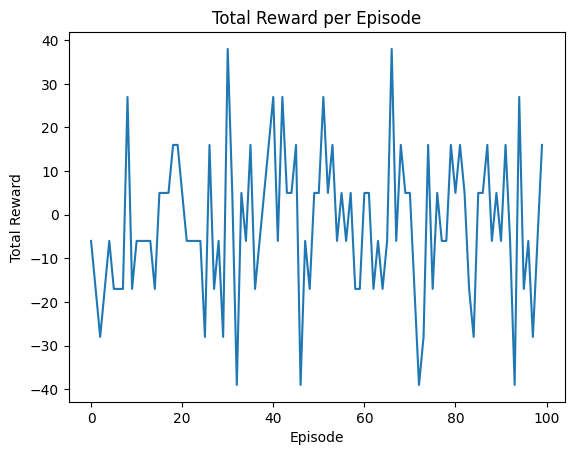

In [138]:
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode")
plt.show()